# **Graphs**

In [0]:
import os
import pandas as pd
import altair as alt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = os.path.join("drive", "My Drive", "MinneMUDAC2019", "newFiles")
march = pd.read_csv(os.path.join(path,"march_new.csv"),skiprows = 3)
may = pd.read_csv(os.path.join(path,"may_new.csv"),skiprows = 3)
july = pd.read_csv(os.path.join(path,"july_new.csv"),skiprows = 3)[252:]
july = july.reset_index(drop=True)

FileNotFoundError: ignored

In [0]:
def getConsecutiveDifference(data, div):
  diff=[]
  for i in range(5, len(data)):
    diff.append(data[i]-data[i-5]);
  return diff

In [0]:
#differences
div = 422
march_diff = getConsecutiveDifference(march['Close'], div)
may_diff = getConsecutiveDifference(may['Close'], div)
july_diff = getConsecutiveDifference(july['Close'], div)

## **Actual**

In [0]:
plt.style.use('seaborn-white')

In [0]:
import matplotlib.dates as mdates
date = mdates.DateFormatter('%d')

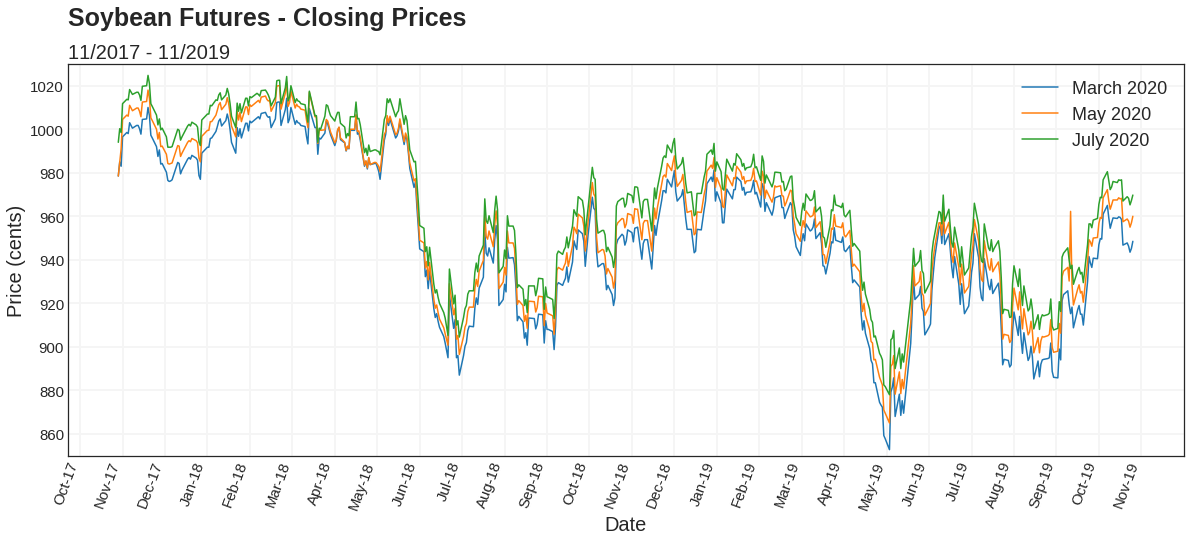

In [0]:

years = mdates.YearLocator()

# Closing Price for all three contracts dates
fig, ax = plt.subplots(figsize=(20, 8))

from datetime import datetime
march['Date'] = pd.to_datetime(march['Date'])
may['Date'] = pd.to_datetime(may['Date'])
july['Date'] = pd.to_datetime(july['Date'])
plt.plot(march['Date'], march['Close'], label='March 2020')
plt.plot(may['Date'] , may['Close'], label='May 2020')
plt.plot(july['Date'] , july['Close'], label='July 2020')

fig.suptitle("Soybean Futures - Closing Prices", fontsize=25, fontweight='bold', x=0.125, horizontalalignment='left')
ax.set_title('11/2017 - 11/2019', fontsize=20, x=0.0, horizontalalignment='left')

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))

ax.set_ylim([850,1030])
ax.grid(linewidth=2, color='whitesmoke')

fig.autofmt_xdate()
plt.xticks(rotation = 70)
ax.tick_params(labelsize=15)
ax.set_xlabel('Date',fontsize = 20)
ax.set_ylabel('Price (cents)', fontsize = 20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [0]:
#Naive Model
def naive_model(month, data):
  fig, ax = plt.subplots(figsize=(20, 8))
  plt.plot(data.index.values, data['Close'], label='Actual Price')
  plt.plot(data.index.values, data['Close'], label='Predicted Price')

  fig.suptitle("Naive Model for Soybean Futures: {} 2020".format(month), fontsize=25)
  ax.set_title('11/2017 - 11/2019', fontsize=20)

  # Format the x axis
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/d"))

  ax.set_xlabel('Date',fontsize = 20)
  ax.set_ylabel('Price ($/100)', fontsize = 20)
  plt.legend(loc='best', fontsize=15)
  plt.xticks(rotation=70)
  plt.show()

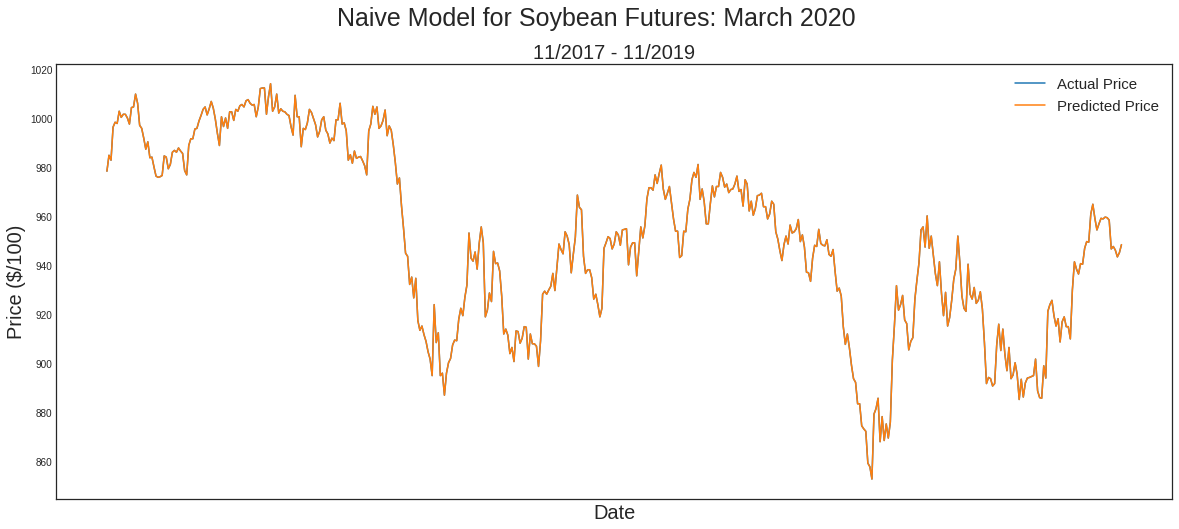

In [0]:
naive_model('March', march)

In [0]:
##Novice Div Plots

In [0]:
import altair as alt

In [0]:
path2 = os.path.join("drive", "My Drive", "MinneMUDAC2019", "Files")

In [0]:
soybeans = pd.read_csv(os.path.join(path2, "novice_cleaned_data.csv"))
soybeans["Date"] = pd.to_datetime(soybeans["Date"])
soybeans["% Increase"] = soybeans["Soybeans_us_exports"].pct_change(periods =1) *100
soybeans["% Increase Ag"] = soybeans["U.S. agricultural exports to the World_us_exports"].pct_change(periods =1) *100
soybeans["% Increase Corn"] = soybeans["Corn_us_exports"].pct_change(periods =1) *100
soybeans["% Increase Comp Soy"] = soybeans["Soybeans_competitor_exports"].pct_change(periods =1) *100

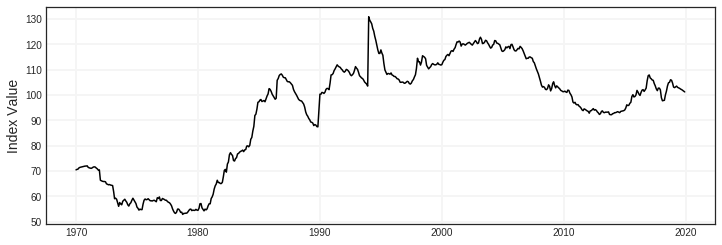

In [0]:
plt.style.use('seaborn-white')
dates = pd.to_datetime(soybeans["Date"])
fig, ax = plt.subplots(figsize=(12,4))
ax.set_ylabel('Index Value', fontsize = 14)
ax.grid(linewidth=2, color='whitesmoke')

plt.plot(dates,soybeans["Soybeans_us_exports"], color='black')

In [0]:
soybeans.head(6)

Unnamed: 0       Date  ...  % Increase Corn  % Increase Comp Soy
0           0 1970-01-01  ...              NaN                  NaN
1           1 1970-02-01  ...         0.078555             0.105152
2           2 1970-03-01  ...        -0.078493            -0.105042
3           3 1970-04-01  ...         0.000000             0.315457
4           4 1970-05-01  ...         0.706991             0.000000
5           5 1970-06-01  ...         0.468019             0.209644

[6 rows x 80 columns]

In [0]:
soybeans['year'] = soybeans['Date'].dt.year.astype('category')

In [0]:
alt.Chart(soybeans).mark_rect().encode(
  alt.X('year(Date):O',title = "Year"),
  alt.Y('quarter(Date):O', title = "Quarterly Inc."),
  color=alt.Color('% Increase', scale=alt.Scale(scheme='redblue', domain=[-2, 2])),
  tooltip = ['Date','% Increase']
).properties(title = "Percent Increase in Soybean US Exports Index").configure_axis(
    labelFontSize=12,
    titleFontSize=15
).configure_title(fontSize=24)

alt.Chart(...)

In [0]:
alt.Chart(soybeans).mark_rect().encode(
  alt.X('year(Date):O',title = "Year"),
  alt.Y('quarter(Date):O', title = "Quarterly Inc."),
  color=alt.Color('% Increase Ag', scale=alt.Scale(scheme='redblue', domain=[-4, 4])),
).properties(title = "").configure_axis(
    labelFontSize=12,
    titleFontSize=15
).configure_title(fontSize=24)

alt.Chart(...)

In [0]:
alt.Chart(soybeans).mark_rect().encode(
  alt.X('year(Date):O',title = "Year"),
  alt.Y('quarter(Date):O', title = "Quarterly Inc."),
  color=alt.Color('% Increase Comp Soy', scale=alt.Scale(scheme='redblue', domain=[-4, 4])),
).properties(title = "").configure_axis(
    labelFontSize=12,
    titleFontSize=15
).configure_title(fontSize=24)

alt.Chart(...)

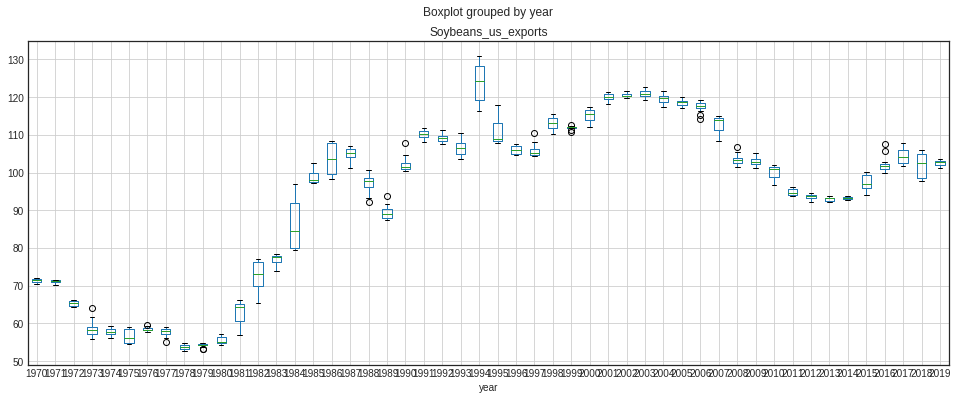

In [0]:
fig, ax = plt.subplots(figsize=(16,6))
plt.suptitle('')
soybeans.boxplot(column=['Soybeans_us_exports'], by='year', ax=ax)


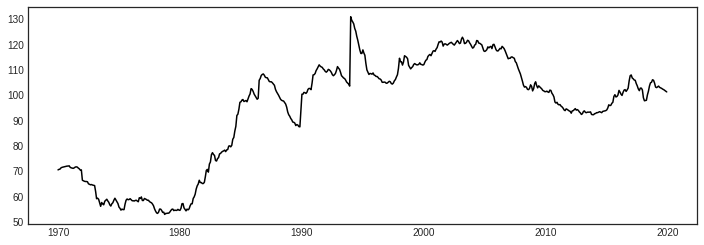

In [0]:
plt.style.use('seaborn-white')
dates = pd.to_datetime(soybeans["Date"])
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(dates,soybeans["Soybeans_us_exports"], color='black')

In [0]:
soybean = [9.35, 9.18, 9.22, 9.3, 9.3, 9.5, 9.81, 9.85, 9.84, 9.55, 9.08, 8.59, 8.77, 8.58, 8.37, 8.57, 8.63, 8.52, 8.52, 8.28, 8.02, 8.31]
canola = [17.3, 16.6, 17.2, 16.7, 17.7, 18.3, 18.2, 17.5, 18.5, 17.2, 17.1, 15.3, 15.2, 15.6, 16, 16.3, 16.7, 16.2, 15.8, 15.8, 15.2, 14.9]


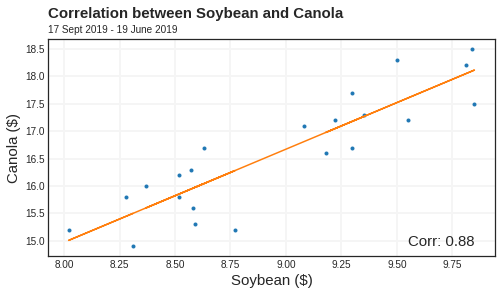

In [0]:
plt.style.use('seaborn-white')
from numpy.polynomial.polynomial import polyfit
fig, ax = plt.subplots(figsize=(8,4))
soybean = np.array(soybean)
canola = np.array(canola)

dataset = pd.DataFrame({'soybean': soybean, 'canola': canola}, columns=['soybean', 'canola'])

corr = dataset.corr()
sc = corr['canola']['soybean']
b, m = polyfit(soybean,canola , 1)
fig.suptitle("Correlation between Soybean and Canola", fontweight='bold', fontsize=15, x=0.125, y=0.99, horizontalalignment='left')
ax.set_title('17 Sept 2019 - 19 June 2019', fontsize=10, x=0.0, horizontalalignment='left')
ax.set_xlabel('Soybean ($)',fontsize = 15)
ax.set_ylabel('Canola ($)', fontsize = 15)
ax.grid(linewidth=2, color='whitesmoke')
fig.text(0.75, 0.2, 'Corr: {}'.format(round(sc, 2)), size=15, ha='left', va='top')
plt.plot(soybean, canola, '.')
plt.plot(soybean, b + m * soybean, linestyle='-')
plt.show()